In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('weight-height.csv')

In [41]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [42]:
df.shape

(10000, 3)

In [43]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_12189/3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

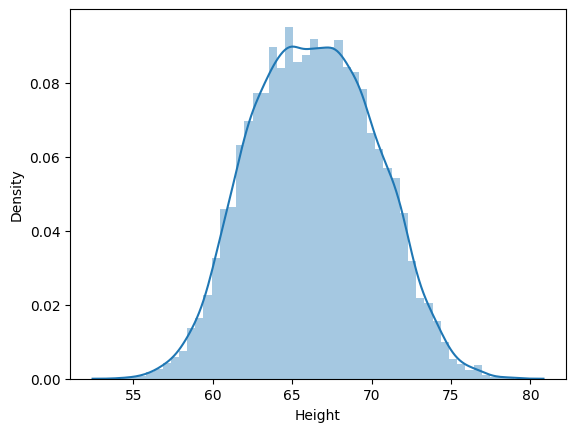

In [44]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

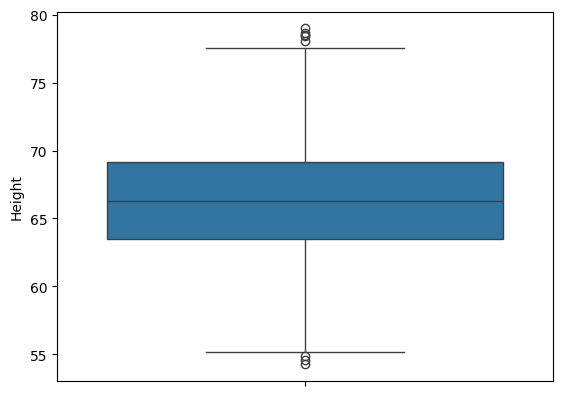

In [45]:
sns.boxplot(df['Height'])

In [46]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [47]:
upper_limit

np.float64(74.7857900583366)

In [48]:
lower_limit

np.float64(58.13441158671655)

` Detect `

In [49]:
df[( df['Height'] < lower_limit) | ( df['Height'] > upper_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


`Remove`

In [50]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit )]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [51]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [52]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_12189/1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

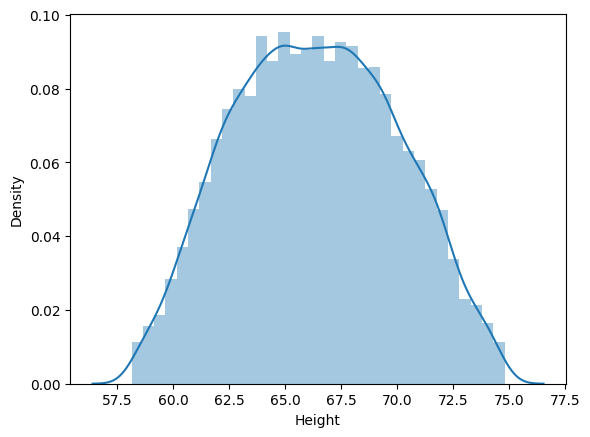

In [53]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

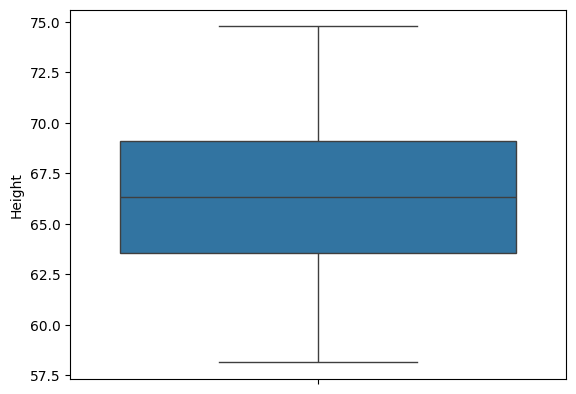

In [54]:
sns.boxplot(new_df['Height'])

In [55]:
# Capping --> Winsorization

df['Height'] = np.where(
    df['Height'] >= upper_limit,
    upper_limit,
    np.where(
        df['Height'] <= lower_limit,
        lower_limit,
        df['Height']
    )
)

In [56]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

/var/folders/1t/qqtm35950b74y6zwph6yt5vm0000gn/T/ipykernel_12189/3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

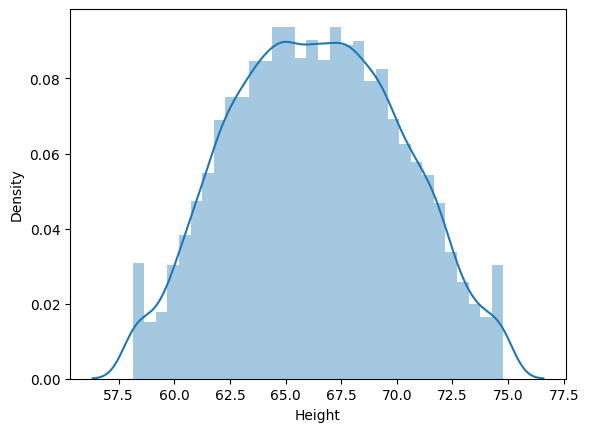

In [57]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

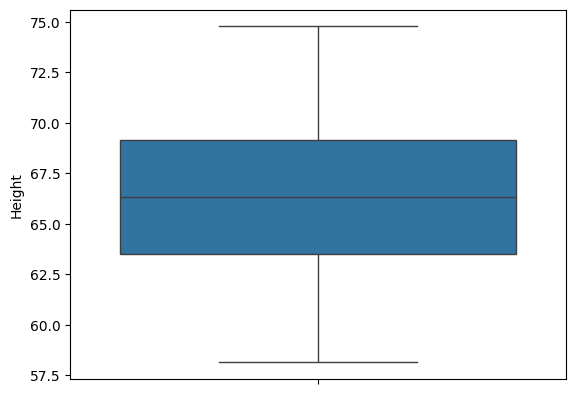

In [58]:
sns.boxplot(df['Height'])

<Axes: title={'center': 'Trimming'}, xlabel='Height', ylabel='Count'>

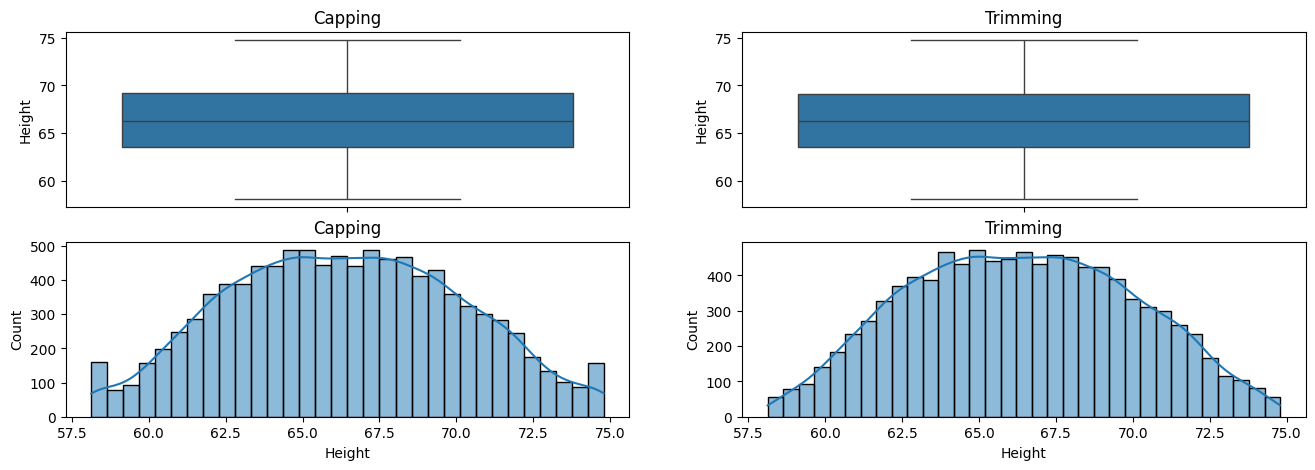

In [70]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.title('Capping')
sns.boxplot(df['Height'])

plt.subplot(2,2,2)
plt.title('Trimming')
sns.boxplot(new_df['Height'])

plt.subplot(2,2,3)
plt.title('Capping')
sns.histplot(df['Height'],kde=True)

plt.subplot(2,2,4)
plt.title('Trimming')
sns.histplot(new_df['Height'],kde=True)